# task is to Predict the percentage of an student based on the no. of study hours. 

In [1]:
#importing the required libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
df=pd.read_csv('student mark task-1grp')
df

,hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#cheking the columns
df.columns

Index(['hours', 'Scores'], dtype='object')

In [5]:
#checking the null values
df.isnull().sum()

hours     0
Scores    0
dtype: int64

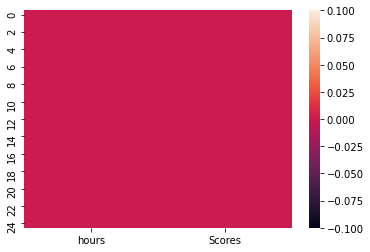

In [6]:
#plotiing heatmap
sns.heatmap(df.isnull())

In [7]:
#checking the correlation 
df.corr()

,hours,Scores
hours,1.000000,0.976191
Scores,0.976191,1.000000


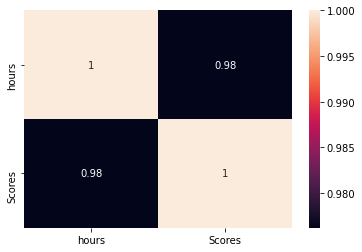

In [8]:
#plotting the heatmap
sns.heatmap(df.corr(),annot=True)

In [9]:
#checking correlation of the hours columns with Scores
corr_matrix=df.corr()
corr_matrix['Scores'].sort_values(ascending=False)

Scores    1.000000
hours     0.976191
Name: Scores, dtype: float64

In [10]:
#checking the statical summary
df.describe()

,hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


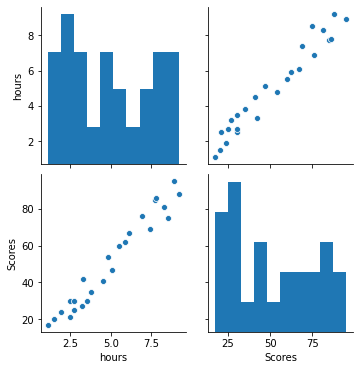

In [11]:
#plotting the pairplot 
sns.pairplot(df)

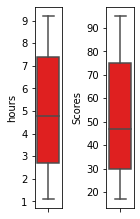

In [12]:
#checking the outlairs
collist=df.columns.values
ncol=30
nrow=15
plt.figure(figsize=(ncol,3*nrow))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='r',orient='v')
    plt.tight_layout()

#from above we can clearly see that there is no outlairs present.

In [13]:
#checking the skewness
df.skew()

hours     0.190338
Scores    0.233965
dtype: float64

#we can clearly see that df.skew() values is lies between (+,-)0.5 se there are skewness present

In [14]:
#sperating the features and target data 
x=df.drop('Scores',axis=1)
x.head()

,hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [15]:
y=df['Scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [16]:
#feature data shape
x.shape

(25, 1)

In [17]:
y=y.values.reshape(-1,1)

In [18]:
#target data shape
y.shape

(25, 1)

# from we can clearly see our target data i.e (y) is in continious type. so we will handel this by LinearRegression method

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [20]:
maxR2=0
maxRS=0
for i in range (0,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    if  r2 > maxR2:
        maxR2=r2
        maxRs=i
print ('best r_2 score is :', maxR2, 'on random_state:',maxRS)
    

best r_2 score is : 0.9758904130113295 on random_state: 0


In [21]:
#train test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=0)
x_train,x_test,y_train,y_test

(    hours
 23    6.9
 14    1.1
 1     5.1
 10    7.7
 13    3.3
 8     8.3
 6     9.2
 18    6.1
 4     3.5
 9     2.7
 7     5.5
 20    2.7
 3     8.5
 0     2.5
 21    4.8
 15    8.9
 12    4.5,
     hours
 5     1.5
 2     3.2
 19    7.4
 16    2.5
 11    5.9
 22    3.8
 17    1.9
 24    7.8,
 array([[76],
        [17],
        [47],
        [85],
        [42],
        [81],
        [88],
        [67],
        [30],
        [25],
        [60],
        [30],
        [75],
        [21],
        [54],
        [95],
        [41]], dtype=int64),
 array([[20],
        [27],
        [69],
        [30],
        [62],
        [35],
        [24],
        [86]], dtype=int64))

In [22]:
x_test

,hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9
22,3.8
17,1.9
24,7.8


In [23]:
#actual data
y_test

array([[20],
       [27],
       [69],
       [30],
       [62],
       [35],
       [24],
       [86]], dtype=int64)

In [24]:
#predicted dta
pred=lr.predict(x_test)
pred

array([[18.49811326],
       [33.65812392],
       [71.11226792],
       [27.41576659],
       [57.73578792],
       [39.00871592],
       [22.06517459],
       [74.67932925]])

#from above two we can clearly comapre our actaula and predicted data

In [25]:
#evaluate the performance of algorithm
print('mean absolute error=',mean_absolute_error(y_test,pred))
print('mean squared error=',mean_squared_error(y_test,pred))
print('Root mean_squared error=',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error= 4.298117018949442
mean squared error= 27.985082454139313
Root mean_squared error= 5.290092858744477
